<a href="https://colab.research.google.com/github/owenfab/IDS/blob/main/HW6/fabula_HW6_problem2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#IDS HW 6
##Owen Fabula
##Problem 2: R
###Part 1: Reading in data and libraries
Before any work could be performed, I needed to read in the data and relevant libraries.

In [2]:
install.packages("C50")
install.packages("rpart.plot")
library(C50)
#rpart and rpart.plot are for the CART model
#see references section
library(rpart)
library(rpart.plot)
library(readr)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘plyr’, ‘Rcpp’, ‘reshape2’, ‘libcoin’, ‘mvtnorm’, ‘Formula’, ‘inum’, ‘Cubist’, ‘partykit’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [3]:
test <- read_csv("https://raw.githubusercontent.com/bforoura/IDS/main/HW6/Loans_Test.csv")
train <- read_csv("https://raw.githubusercontent.com/bforoura/IDS/main/HW6/Loans_Training.csv")

Rows: 49698 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (4): Debt-to-Income Ratio, FICO Score, Request Amount, Interest
lgl (1): Approval

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 150302 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (4): Debt-to-Income Ratio, FICO Score, Request Amount, Interest
lgl (1): Approval

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


###Part 1a: Cleaning the data
Before any modeling could be done, I checked to see if there were any missing values in the dataset.

In [11]:
#check for missing vals
cat("num NA in train: ",sum(is.na(train)),"\n")
cat("num NA in test: ",sum(is.na(test)))

num NA in train:  0 
num NA in test:  0

From the above output, I knew that there were not any missing values in the dataset. I also saw from multiple visual inspections of the dataset that there were no placeholder values like '?' or 99999, so the dataset was clean. Modeling could begin.

In [4]:
#look at data sets - just to mkae sure that the data has the expected features
head(train)
head(test)

Approval,Debt-to-Income Ratio,FICO Score,Request Amount,Interest
<lgl>,<dbl>,<dbl>,<dbl>,<dbl>
FALSE,0,397,1000,450
FALSE,0,403,500,225
FALSE,0,408,1000,450
FALSE,0,408,2000,900
FALSE,0,411,5000,2250
FALSE,0,413,5000,2250


Approval,Debt-to-Income Ratio,FICO Score,Request Amount,Interest
<lgl>,<dbl>,<dbl>,<dbl>,<dbl>
FALSE,0,413,2000,900
FALSE,0,449,1000,450
FALSE,0,454,6000,2700
FALSE,0,456,1000,450
FALSE,0,457,1000,450
FALSE,0,457,8000,3600


###Part 2: Using a CART model
First, I used a CART model on the training data to classify Approval based on the other features in the data set.<br />To begin, I needed to prepare the training set by differentiating between the features and the target attribute. These will also be used for the C5.0 model.

In [5]:
#predictors
predictors <- data.frame(train$`Debt-to-Income Ratio`, train$`FICO Score`, train$`Request Amount`, train$Interest)
#get target (Approval)
train$Approval <- factor(train$Approval)
#make sure they're good
head(predictors)
head(train$Approval)

,train..Debt.to.Income.Ratio.,train..FICO.Score.,train..Request.Amount.,train.Interest
,<dbl>,<dbl>,<dbl>,<dbl>
1,0,397,1000,450
2,0,403,500,225
3,0,408,1000,450
4,0,408,2000,900
5,0,411,5000,2250
6,0,413,5000,2250


[1] FALSE FALSE FALSE FALSE FALSE FALSE
Levels: FALSE TRUE

Next, I needed to fit a CART model to the data. To do that, I used the following code:

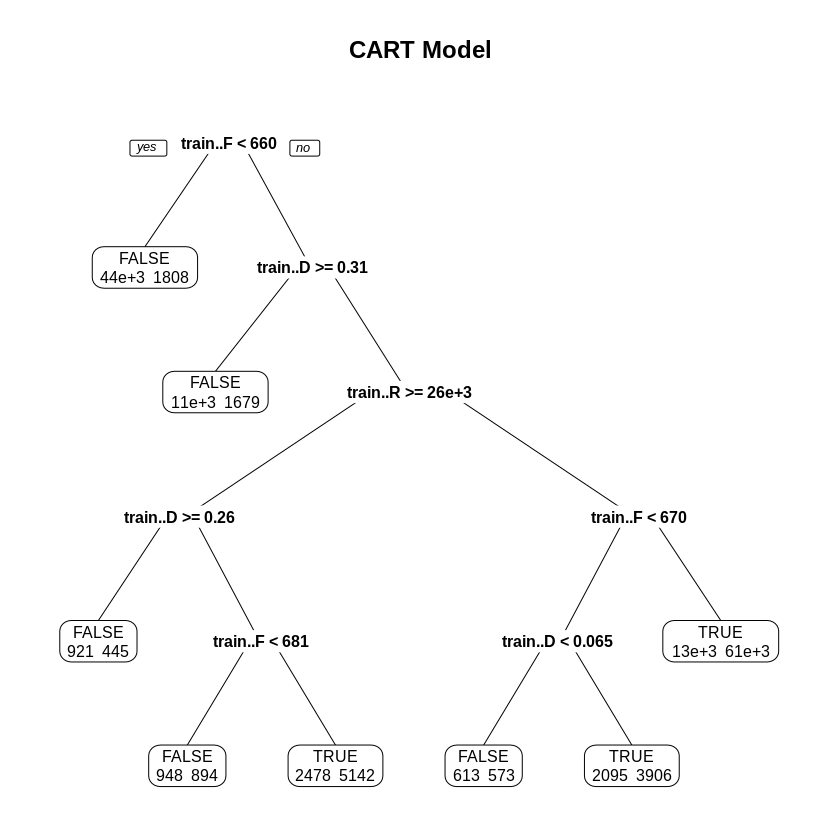

In [17]:
#fit CART to data - see references for how to use rpart and rpart.plot
tree <- rpart(train$Approval ~ ., data = predictors, control = rpart.control(cp = 0.0001, minbucket = 1000))
#plot the tree using prp from rpart.plot
prp(tree, faclen = 2, cex = 0.8, extra = 1, main = "CART Model")

####Describing the above model's first few steps
The CART classifier first checks whether the given row's FICO score is less than 660. If yes, then the classifies the row in question as FALSE (i.e., not approved); if no, the model then checks if the given row's Request Amount is greater than or equal to 26000. If yes, then it checks if the given row's debt-to-income ratio is greater than or equal to 0.26: if yes, then the row is classified as FALSE; if no, then it examines the given row's FICO score.

###Part 3: Using a C5.0 Model
To use a C5.0 model on the training data, I used the following code:

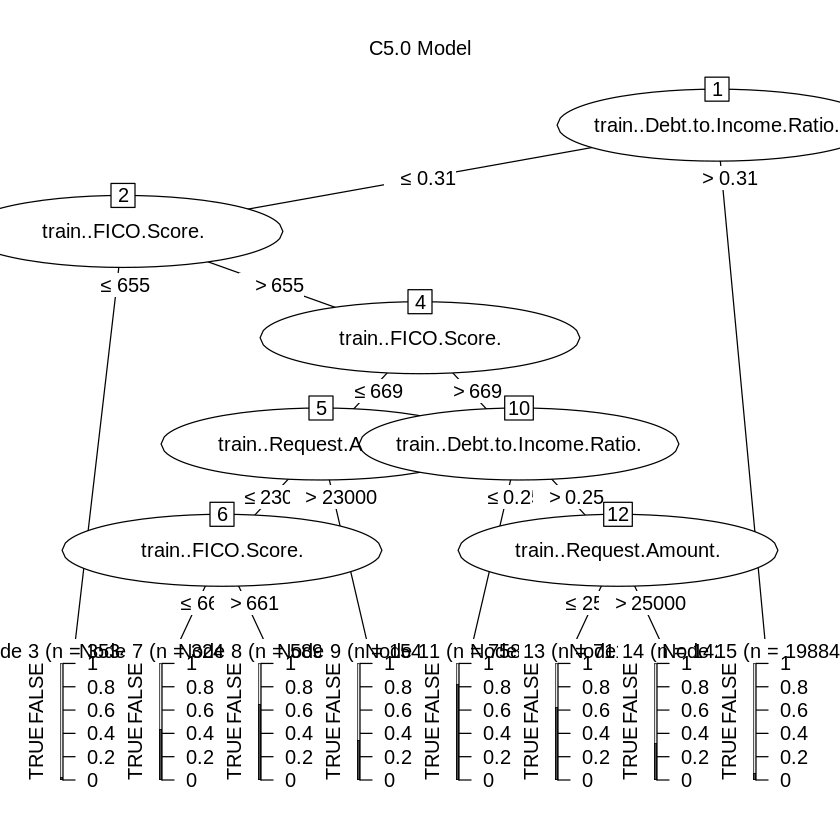

In [22]:
#make thr C5.0 model
model1 <- C5.0(predictors, train$Approval, control = C5.0Control(noGlobalPruning = FALSE, minCases=1000))
#plot it
plot(model1, main="C5.0 Model")

####Describing the above model's first few steps
The C5.0 classifier first checks if the given row's debt-to-income ratio is greater than 0.31: if no, then it classifies the given row as FALSE; if yes, the model then checks if the given row's FICO score is less than or equal to 655. If yes, then it classifies the given row as FALSE; if no, then the model considers the given row's FICO score again. If the given row's FICO score is less than or equal to 668, then the model checks the given row's Request Amount. If the given row's Request Amount is greater than 23000, then the model classifies the given row as FALSE.

###Part 4: Comparing the models
The CART and C5.0 models are similar in a few ways:<ui><li>Both models terminate with 8 total leaf nodes.</li><li>Both models do not consider Intrest to important for classification (i.e., both models exclude it from their decision rules).</li><li>There are some common split values, however:<ul><li>For example, when both models split on debt-to-income ratio for the <em>first</em> time, they both chose the values 0.31 for comparison, so clearly both models were able to determine that that value led to information gain.</li></ul></li></ui>The CART and C5.0 models do have a few differences, however:<ul><li>The CART model first considers FICO score, whereas the C5.0 model first considers debt-to-income ratio.<ul><li>There are numerous other differences between the models' decision rules, but this is the most apparent.</li></ul></li></ul>

#References
rpart and rpart.plot for CART model: https://rpubs.com/minma/cart_with_rpart<br />
rpart control: https://www.rdocumentation.org/packages/rpart/versions/4.1.21/topics/rpart.control